# Exploration of the Claimbuster dataset

In this jupyter notebook, the Claimbuster dataset from Arslan et al. 2020 (https://ojs.aaai.org/index.php/ICWSM/article/view/7346) is explored. It is a dataset related to checkworthiness detection that utilize 3 multiclass labels.

This notebook looks at the distribution of the data, both in terms of words used, speaker party, and verdicts

## Import of modules

First, relevant Python modules are imported

In [2]:
%load_ext autoreload
%autoreload

from claimbuster_utils import load_claimbuster_dataset, ClaimbusterBinaryLabel, ClaimbusterSpeakerParty, ClaimBusterSpeakerTitle, NCS_RATIO
from plotting_utils import dataframe_to_text, show_word_cloud, show_bar_plot, show_histogram_plot, show_sub_plots_with_legends, show_sub_plots_pie_chart
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

folder_path = os.path.join("../data", "ClaimBuster", "datasets")
binary_verdicts = [ClaimbusterBinaryLabel.CFS, ClaimbusterBinaryLabel.NCS]



## Binary data

First, the binary dataset 2xNCS is loaded and explored

In [3]:
binary_data = load_claimbuster_dataset(folder_path, ncs_ratio=NCS_RATIO.TWO_AND_A_HALF)
print(f"{binary_data.shape=}")
binary_data.head()

binary_data.shape=(9674, 2)


,Verdict,Text
sentence_id,,
27247,1,We're 9 million jobs short of that.
10766,1,"You know, last year up to this time, we've los..."
3327,1,And in November of 1975 I was the first presid...
19700,1,And what we've done during the Bush administra...
12600,1,Do you know we don't have a single program spo...


### Wordclouds

Four wordclouds are generated based on the different verdicts:

- All sentences
- Check-worthy Factual Sentences (CFS)
- Non-Check-worthy Sentences (NCS)

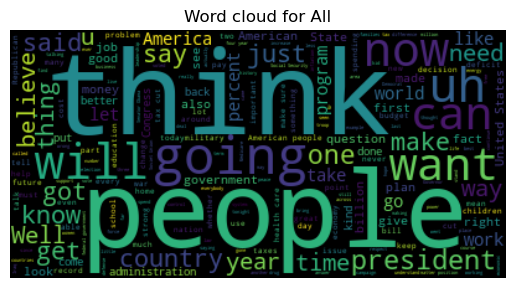

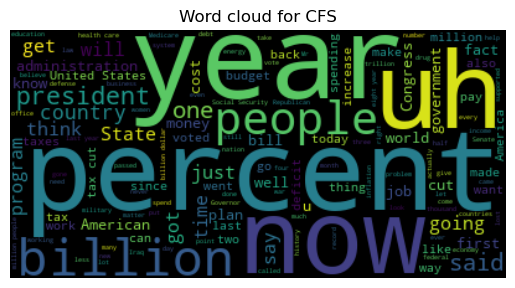

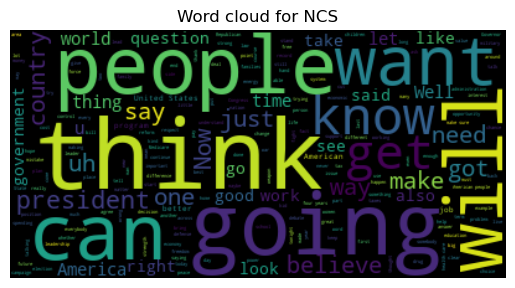

In [17]:
%autoreload

categories = ["All", "CFS", "NCS"]
titles = [f"Word cloud for {category}" for category in categories]
base_dir = os.path.join("..", "figures", "claimbuster", "wordclouds")
file_paths = [os.path.join(base_dir, f"{category}.png") for category in categories] 

if not os.path.exists(base_dir):
    os.makedirs(base_dir)
    
for verdict, speaker_party, file_path in zip(binary_verdicts, titles, file_paths):
    if verdict is None:
        text = dataframe_to_text(binary_data, labels=["Text"])
    else:
        filtered_data = binary_data[binary_data["Verdict"] == verdict.value]
        text = dataframe_to_text(filtered_data, labels=["Text"])
    show_word_cloud(text, speaker_party, file_path)



### Total distribution

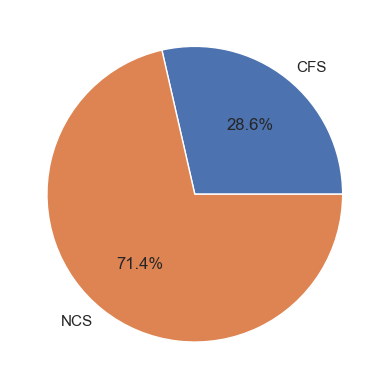

In [6]:
%autoreload

x = ["CFS", "NCS"]
y = [binary_data[binary_data["Verdict"] == verdict.value].shape[0] for verdict in binary_verdicts]
speaker_party = "Total distribution of verdicts"
file_path = os.path.join("..", "figures", "claimbuster", "verdict_distribution", "total_distribution.pdf")

if not os.path.exists(os.path.dirname(file_path)):
    os.makedirs(os.path.dirname(file_path))
plt.pie(y, labels=x, autopct='%.1f%%')
plt.savefig(file_path)

### Sentence length

Looking at the length of the sentences related to the different verdicts


'Overall sentence word count'

count    9674.000000
mean       18.364379
std        12.976820
min         5.000000
25%         9.000000
50%        15.000000
75%        24.000000
max       152.000000
Name: Text, dtype: float64

'Sentence lengths for verdict CFS'

count    2764.000000
mean       23.470333
std        15.098933
min         5.000000
25%        13.000000
50%        20.000000
75%        30.000000
max       152.000000
Name: Text, dtype: float64

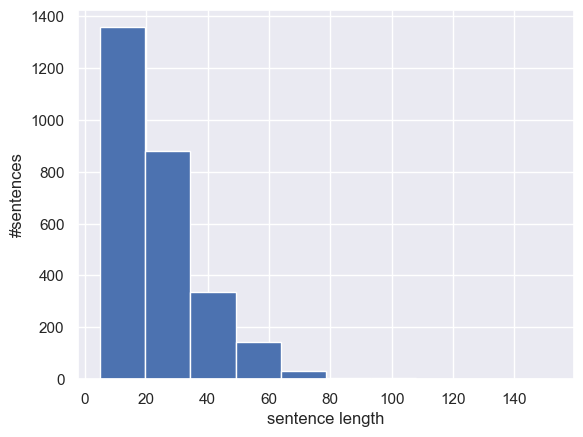

'Sentence lengths for verdict NCS'

count    6910.000000
mean       16.321997
std        11.401479
min         5.000000
25%         8.000000
50%        13.000000
75%        21.000000
max       110.000000
Name: Text, dtype: float64

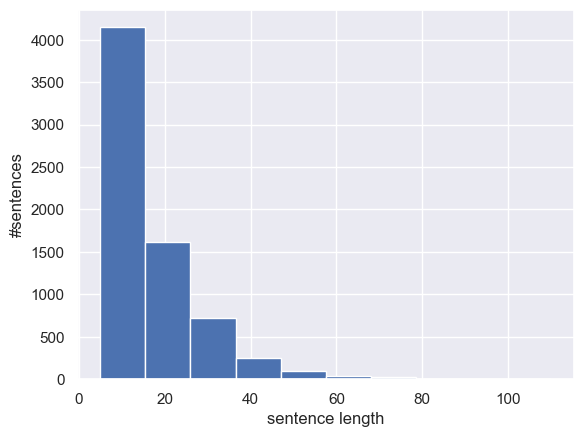

In [4]:
display('Overall sentence word count')
sentence_lengths = binary_data["Text"].str.split().str.len()
display(sentence_lengths.describe())
for verdict in binary_verdicts:
    filtered_data = binary_data[binary_data["Verdict"] == verdict.value]
    sentence_lengths = filtered_data["Text"].str.split().str.len()
    # file_path = os.path.join("..", "figures", "claimbuster", "verdict_distribution", f"{verdict}.png")
    display(f"Sentence lengths for verdict {verdict.name}")
    display(sentence_lengths.describe())
    show_histogram_plot(x=sentence_lengths, xlabel="sentence length", ylabel="#sentences")

### Average word lengths

Looking at the average word lengths for each sentence for the different verdicts.

'Average word length for verdict CFS'

count    2764.000000
mean        4.666164
std         0.589931
min         2.812500
25%         4.272254
50%         4.611678
75%         5.000000
max         8.200000
Name: Text, dtype: float64

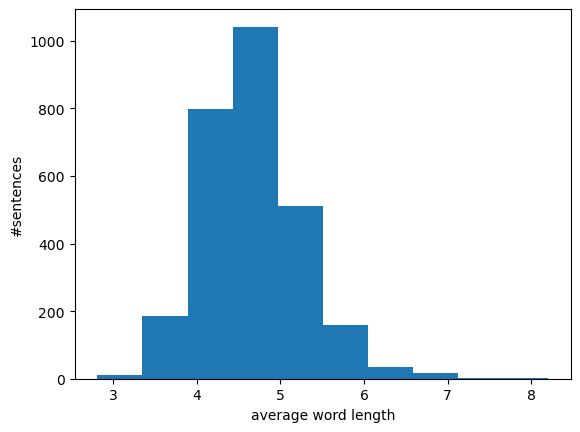

'Average word length for verdict NCS'

count    6910.000000
mean        4.413553
std         0.664012
min         2.166667
25%         4.000000
50%         4.363636
75%         4.780382
max        11.333333
Name: Text, dtype: float64

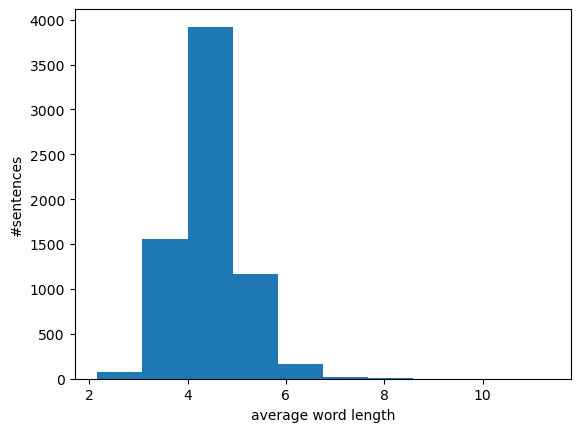

In [51]:
for verdict in binary_verdicts:
    filtered_data = binary_data[binary_data["Verdict"] == verdict.value]
    avg_word_lengths = filtered_data["Text"].str.split().agg(lambda x: np.mean([len(word) for word in x]))
    display(f"Average word length for verdict {verdict.name}")
    display(avg_word_lengths.describe())
    show_histogram_plot(x=avg_word_lengths, xlabel="average word length", ylabel="#sentences")

## Multi class data

Then, the multi class dataset is loaded and explored

In [18]:
multi_class_data = load_claimbuster_dataset(folder_path, use_binary_labels=False)
print(f"{multi_class_data.shape=}")
multi_class_data.head()

multi_class_data.shape=(23533, 9)


,Text,Speaker,Speaker_title,Speaker_party,File_id,Length,Line_number,Sentiment,Verdict
Sentence_id,,,,,,,,,
16,I think we've seen a deterioration of values.,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,8,16,0.000000,-1
17,I think for a while as a nation we condoned th...,George Bush,Vice President,REPUBLICAN,1988-09-25.txt,16,17,-0.456018,-1
18,"For a while, as I recall, it even seems to me ...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,29,18,-0.805547,-1
19,"So we've seen a deterioration in values, and o...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,35,19,0.698942,-1
20,"We got away, we got into this feeling that val...",George Bush,Vice President,REPUBLICAN,1988-09-25.txt,15,20,0.000000,-1


### Verdicts per speaker party

Looking at the verdict distributions for the different party affiliations:
- Republican
- Democrat
- Independent

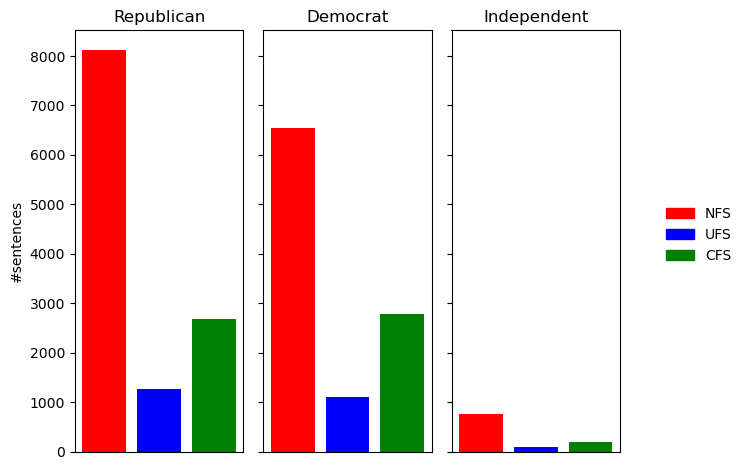

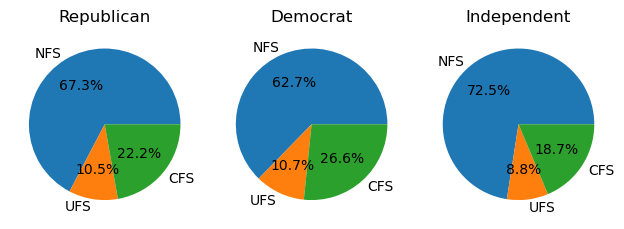

In [21]:
%autoreload

speaker_parties = [
    ClaimbusterSpeakerParty.REPUBLICAN.value,
    ClaimbusterSpeakerParty.DEMOCRAT.value,
    ClaimbusterSpeakerParty.INDEPENDENT.value,
]
titles = ["Republican", "Democrat", "Independent"]
legends = ["NFS", "UFS", "CFS"]
ylabel = "#sentences"
values = []
for speaker_party in speaker_parties:
    verdict_counts = multi_class_data[multi_class_data["Speaker_party"] == speaker_party].groupby("Verdict", sort=True).size().to_list()
    values += verdict_counts
bar_plot_file_path = os.path.join("..", "figures", "claimbuster", "verdict_distribution", "speaker_party_bar_plot.png")
if not os.path.exists(os.path.dirname(bar_plot_file_path)):
    os.makedirs(os.path.dirname(bar_plot_file_path))
show_sub_plots_with_legends(
    values=values,
    group_size=3, 
    titles=titles, 
    legends=legends, 
    ylabel=ylabel, 
    colors=["red", "blue", "green"],
    file_path=bar_plot_file_path
)

pie_chart_file_path = os.path.join("..", "figures", "claimbuster", "verdict_distribution", "speaker_party_pie_chart.png")
show_sub_plots_pie_chart(values=values, group_size=3, titles=titles, labels=legends, file_path=pie_chart_file_path)

### Verdicts per speaker title
Looking at the verdict distributions for the different speaker titles:
- Governor
- President
- Senator
- Other (merging Congressman, Former Vice President, Independent Candidate and Vice president categories)

Speaker_title
Businessman              1637
Congressman               146
Former Vice President     597
Governor                 5507
Independent Candidate     910
President                5466
Secretary                 389
Secretary of State        719
Senator                  5540
Vice President           2622
dtype: int64


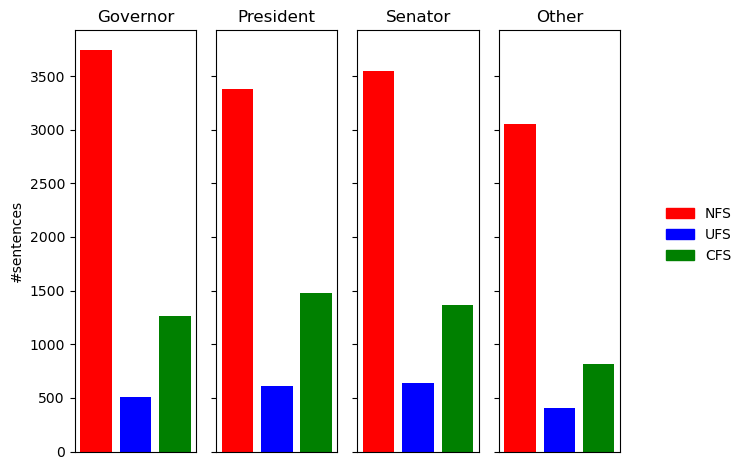

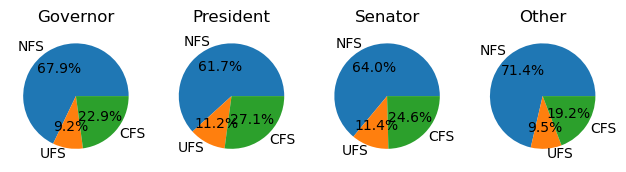

In [22]:
%autoreload

print(multi_class_data.groupby("Speaker_title").size())
speaker_titles = [
    ClaimBusterSpeakerTitle.GOVERNOR.value,
    ClaimBusterSpeakerTitle.PRESIDENT.value,
    ClaimBusterSpeakerTitle.SENATOR.value,
]
titles = ["Governor", "President", "Senator", "Other"]
legends = ["NFS", "UFS", "CFS"]
values = []
for speaker_title in [*speaker_titles, "Other"]:
    if speaker_title == "Other":
        other_titles = set([item.value for item in ClaimBusterSpeakerTitle]) - set(speaker_titles)
        verdict_counts = multi_class_data[multi_class_data["Speaker_title"].isin(other_titles)].groupby("Verdict", sort=True).size().to_list()
    else:
        verdict_counts = multi_class_data[multi_class_data["Speaker_title"] == speaker_title].groupby("Verdict", sort=True).size().to_list()
    values += verdict_counts
bar_plot_file_path = os.path.join("..", "figures", "claimbuster", "verdict_distribution", "speaker_title_bar_plot.png")
if not os.path.exists(os.path.dirname(bar_plot_file_path)):
    os.makedirs(os.path.dirname(bar_plot_file_path))
show_sub_plots_with_legends(
    values=values,
    group_size=3, 
    titles=titles, 
    legends=legends, 
    ylabel=ylabel, 
    colors=["red", "blue", "green", "orange"],
    file_path=bar_plot_file_path
)
pie_chart_file_path = os.path.join("..", "figures", "claimbuster", "verdict_distribution", "speaker_title_pie_chart.png")
show_sub_plots_pie_chart(values=values, group_size=3, titles=titles, labels=legends, file_path=pie_chart_file_path)